### Set-up, imports, constants

In [ ]:
# Establishes connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setu

In [ ]:
import torch
import torchvision
from torchvision import tv_tensors
from torchvision.io import read_image
from torchvision.transforms import functional as func
from torchvision.transforms import v2 as T
from torchvision.transforms.v2 import functional as F_tv

import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.utils.random as four
from fiftyone import ViewField as F

import json
import os
from PIL import Image

Migrating database to v0.23.4


INFO:fiftyone.migrations.runner:Migrating database to v0.23.4


In [ ]:
# Obtain pytorch helper functions for detection
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")

import utils
from engine import train_one_epoch, evaluate

In [ ]:
BASE_PATH = "drive/MyDrive/Project_Practice/"
IDS_FILE_PATH = BASE_PATH + "ids.txt"
EXPORT_DIR = BASE_PATH + r"Images/"
LABELS_PATH = EXPORT_DIR + "labels.json"

TRAIN_EXPORT_DIR = BASE_PATH + r"Train_Images/"
TRAIN_LABELS_PATH = TRAIN_EXPORT_DIR + "labels.json"
VAL_EXPORT_DIR = BASE_PATH + r"Val_Images/"
VAL_LABELS_PATH = VAL_EXPORT_DIR + "labels.json"
TEST_EXPORT_DIR = BASE_PATH + r"Test_Images/"
TEST_LABELS_PATH = TEST_EXPORT_DIR + "labels.json"

CLASSES = ['bed', 'chair', 'tv', 'dining table', 'couch', 'laptop', 'clock', 'cup', 'sink', 'refrigerator']
MAX_SAMPLES_TO_LOAD = 5000
DATASET_TYPE = fo.types.COCODetectionDataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Load and process full dataset

In [ ]:
full_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections"],
    classes=CLASSES,
    max_samples=MAX_SAMPLES_TO_LOAD,
)
full_dataset.persistent = True
all_classes = full_dataset.default_classes # An easy way to obtain all COCO dataset classes and their IDs

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [20.9s elapsed, 0s remaining, 107.4Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [20.9s elapsed, 0s remaining, 107.4Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 5 images


 100% |██████████████████████| 5/5 [3.8s elapsed, 0s remaining, 1.3 images/s]      


INFO:eta.core.utils: 100% |██████████████████████| 5/5 [3.8s elapsed, 0s remaining, 1.3 images/s]      


Writing annotations for 5 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 5 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |█████████████████████| 5/5 [67.6ms elapsed, 0s remaining, 73.9 samples/s]     


INFO:eta.core.utils: 100% |█████████████████████| 5/5 [67.6ms elapsed, 0s remaining, 73.9 samples/s]     


Dataset 'coco-2017-train-5' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-5' created


In [ ]:
# Session used to visually pick out pictures with rooms and then save the subset of them to a json file
full_dataset_session = fo.launch_app(full_dataset)

### Obtain subset

In [ ]:
# Extracts sample ids to a list from a saved JSON file that was obtained through the FiftyOne visual interface
def extract_sample_ids(json_file_path):
    ids_file = open(json_file_path, "r")
    json_str = ids_file.read()
    json_data = json.loads(json_str)
    sample_ids = []

    for item in json_data:
        if 'kwargs' in item and isinstance(item['kwargs'], list):
            for kwarg in item['kwargs']:
                if kwarg[0] == 'sample_ids' and isinstance(kwarg[1], list):
                    sample_ids.extend(kwarg[1])

    return sample_ids

def export_dataset(dataset_or_view, filepath):
    dataset_type = DATASET_TYPE
    dataset_or_view.export(
        export_dir=filepath,
        dataset_type=dataset_type,
    )

# Removes all discardable classes and annotations that reference those classes
def filter_json_by_categories(json_file_path, categories_to_keep):
    with open(json_file_path, "r+") as labels_file:
        json_str = labels_file.read()
    json_data = json.loads(json_str)

    category_ids_to_keep = {cat['id'] for cat in json_data['categories'] if cat['name'] in categories_to_keep}

    json_data['categories'] = [cat for cat in json_data['categories'] if cat['id'] in category_ids_to_keep]
    json_data['annotations'] = [anno for anno in json_data['annotations'] if anno['category_id'] in category_ids_to_keep]

    with open(json_file_path, 'w') as outfile:
        json.dump(json_data, outfile, indent=4)

    return json_data

# Returns a dictionary with category names as keys and ids as values
def get_category_ids(json_file_path):
  category_ids = {}

  with open(json_file_path, "r+") as labels_file:
        json_str = labels_file.read()
  json_data = json.loads(json_str)

  for cat in json_data['categories']:
    category_ids[cat["name"]] = cat["id"]

  return category_ids

# Changes IDs in the FiftyOne exported dataset's label file, so that they align with COCO dataset class IDs (initially upon export they don't align)
def make_labels_coco_compatible(json_file_path, coco_ids):
    with open(json_file_path, "r+") as labels_file:
        json_str = labels_file.read()
    json_data = json.loads(json_str)

    ids_swap = {}
    for cat in json_data['categories']:
      ids_swap[cat['id']] = coco_ids[cat['name']]
      cat['id'] = coco_ids[cat['name']]

    for anno in json_data['annotations']:
      anno['category_id'] = ids_swap[anno['category_id']]

    with open(json_file_path, 'w') as outfile:
        json.dump(json_data, outfile, indent=4)

    return json_data

In [ ]:
# Obtains dataset with specified IDs and exports it to drive
ids = extract_sample_ids(IDS_FILE_PATH)
subset = full_dataset.select(ids)
export_dataset(subset, EXPORT_DIR)

 100% |███████████████| 1008/1008 [8.9s elapsed, 0s remaining, 112.6 samples/s]      


In [ ]:
# Removes all categories, annotations from the labels file that doesn't concern our selected categories
json_data = filter_json_by_categories(LABELS_PATH, CLASSES)

In [ ]:
coco_ids = {}
for object_class in CLASSES:
  for i in range(len(all_classes)):
    if object_class == all_classes[i]:
      coco_ids[object_class] = i
      break

json_data = make_labels_coco_compatible(LABELS_PATH, coco_ids)

In [ ]:
# Numerical ids for our categories, used in finetuning
category_ids = get_category_ids(LABELS_PATH)

### Dataset import

In [ ]:
def get_category_counts(json_file_path):
    labels_file = open(json_file_path, "r")
    json_str = labels_file.read()
    data = json.loads(json_str)

    category_counts = {}
    counted_categories = set()

    for annotation in data['annotations']:
        category_id = annotation['category_id']
        image_id = annotation['image_id']
        category_name = next((cat['name'] for cat in data['categories'] if cat['id'] == category_id), None)

        if category_name is None:
            continue

        category_image_pair = (category_id, image_id)

        if category_image_pair not in counted_categories:
            # If not counted, add to the set and update the count
            counted_categories.add(category_image_pair)
            category_counts[category_name] = category_counts.get(category_name, 0) + 1

    return category_counts

In [ ]:
dataset_import = fo.Dataset.from_dir(
    dataset_dir=EXPORT_DIR,
    dataset_type=DATASET_TYPE,
    name="my_dataset",
)

 100% |███████████████| 1008/1008 [4.6s elapsed, 0s remaining, 260.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [4.6s elapsed, 0s remaining, 260.0 samples/s]      


In [ ]:
# Verify that all classes represented in at least 100 images
class_counts = get_category_counts(LABELS_PATH)
for image_class in CLASSES:
    image_class_count = class_counts[image_class]
    print(f"{image_class} : {image_class_count}")

bed : 194
chair : 341
tv : 274
dining table : 172
couch : 211
laptop : 155
clock : 137
cup : 216
sink : 312
refrigerator : 125


In [ ]:
session = fo.launch_app(dataset_import)

### Dataset evaluation

In [ ]:
def evaluate_model(dataset, model, model_name, device, classes, confidence_threshold):
  model.eval()
  # Add predictions to samples
  with fo.ProgressBar() as pb:
      for sample in pb(dataset):
          # Load image
          image = Image.open(sample.filepath)
          image = func.to_tensor(image).to(device)
          c, h, w = image.shape

          # Perform inference
          preds = model([image])[0]
          labels = preds["labels"].cpu().detach().numpy()
          scores = preds["scores"].cpu().detach().numpy()
          boxes = preds["boxes"].cpu().detach().numpy()

          # Convert detections to FiftyOne format
          detections = []
          for label, score, box in zip(labels, scores, boxes):
              # Convert to [top-left-x, top-left-y, width, height]
              # in relative coordinates in [0, 1] x [0, 1]
              x1, y1, x2, y2 = box
              rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

              detections.append(
                  fo.Detection(
                      label=classes[label],
                      bounding_box=rel_box,
                      confidence=score
                  )
              )

          # Save predictions to dataset
          sample[model_name + "_sample"] = fo.Detections(detections=detections)
          sample.save()

  print("Finished adding predictions")

  high_conf_view = dataset_import.filter_labels(model_name + "_sample", F("confidence") > confidence_threshold, only_matches=False)

  results = high_conf_view.evaluate_detections(
      model_name + "_sample",
      gt_field="detections",
      eval_key=model_name + "_eval_key",
      compute_mAP=True,
  )

  return results

In [ ]:
# Create a list of top 5 pretrained PyTorch detection models with highest mAP score
models = []

model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(pretrained=True)
model.to(device)
model.eval()
models.append((model, "FASTERRCNN_RESNET50_FPN_V2"))

model = torchvision.models.detection.retinanet_resnet50_fpn_v2(pretrained=True)
model.to(device)
model.eval()
models.append((model, "RETINANET_RESNET50_FPN_V2"))

model = torchvision.models.detection.fcos_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()
models.append((model, "FCOS_RESNET50_FPN"))

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()
models.append((model, "FASTERRCNN_RESNET50_FPN"))

model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()
models.append((model, "RETINANET_RESNET50_FPN"))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet

In [ ]:
all_results = []
for model_tuple in models:
  model = model_tuple[0]
  model_name = model_tuple[1]
  print("Evaluating " + model_name)

  results = evaluate_model(dataset_import, model, model_name, device, all_classes, 0.5)
  all_results.append((results, model_name))

Evaluating FASTERRCNN_RESNET50_FPN_V2
 100% |███████████████| 1008/1008 [3.4m elapsed, 0s remaining, 5.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [3.4m elapsed, 0s remaining, 5.4 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [47.3s elapsed, 0s remaining, 17.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [47.3s elapsed, 0s remaining, 17.9 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [18.3s elapsed, 0s remaining, 57.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [18.3s elapsed, 0s remaining, 57.8 samples/s]      


Evaluating RETINANET_RESNET50_FPN_V2
 100% |███████████████| 1008/1008 [3.7m elapsed, 0s remaining, 4.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [3.7m elapsed, 0s remaining, 4.0 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [20.7s elapsed, 0s remaining, 39.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [20.7s elapsed, 0s remaining, 39.1 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [15.9s elapsed, 0s remaining, 89.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [15.9s elapsed, 0s remaining, 89.6 samples/s]      


Evaluating FCOS_RESNET50_FPN
 100% |███████████████| 1008/1008 [4.3m elapsed, 0s remaining, 4.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [4.3m elapsed, 0s remaining, 4.9 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [32.2s elapsed, 0s remaining, 29.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [32.2s elapsed, 0s remaining, 29.3 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [14.3s elapsed, 0s remaining, 68.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [14.3s elapsed, 0s remaining, 68.8 samples/s]      


Evaluating FASTERRCNN_RESNET50_FPN
 100% |███████████████| 1008/1008 [4.4m elapsed, 0s remaining, 4.7 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [4.4m elapsed, 0s remaining, 4.7 samples/s]       


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [50.0s elapsed, 0s remaining, 15.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [50.0s elapsed, 0s remaining, 15.9 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [20.0s elapsed, 0s remaining, 52.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [20.0s elapsed, 0s remaining, 52.4 samples/s]      


Evaluating RETINANET_RESNET50_FPN
 100% |███████████████| 1008/1008 [5.7m elapsed, 0s remaining, 2.8 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [5.7m elapsed, 0s remaining, 2.8 samples/s]       


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [24.4s elapsed, 0s remaining, 33.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [24.4s elapsed, 0s remaining, 33.1 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [12.8s elapsed, 0s remaining, 77.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [12.8s elapsed, 0s remaining, 77.4 samples/s]      


In [ ]:
for results in all_results:
  print("========= " + results[1] + " =========")
  results[0].print_report(classes=CLASSES)

========= FASTERRCNN_RESNET50_FPN_V2 =========
              precision    recall  f1-score   support

         bed       0.82      0.98      0.89       222
       chair       0.64      0.86      0.74       839
          tv       0.80      0.92      0.86       327
dining table       0.46      0.78      0.58       211
       couch       0.71      0.83      0.76       292
      laptop       0.86      0.91      0.88       196
       clock       0.63      0.82      0.71       188
         cup       0.57      0.76      0.65       435
        sink       0.60      0.90      0.72       375
refrigerator       0.69      0.95      0.80       130

   micro avg       0.65      0.86      0.74      3215
   macro avg       0.68      0.87      0.76      3215
weighted avg       0.66      0.86      0.75      3215

========= RETINANET_RESNET50_FPN_V2 =========
              precision    recall  f1-score   support

         bed       0.95      0.88      0.91       222
       chair       0.89      0.61      

In [ ]:
# Based on results selected FASTERRCNN_RESNET50_FPN_V2 and FCOS_RESNET50_FPN for further evaluation
# as they provided the best F1 scores and had good recall
# Models further evaluated in difference confidence thresholds
confidences = [0.6, 0.75, 0.9]
confidence_evaluations = []
for confidence in confidences:
  confidence_evaluations.append((models[0][0], models[0][1], confidence))
  confidence_evaluations.append((models[2][0], models[2][1], confidence))

In [ ]:
confidence_results = []
for confidence_evaluation in confidence_evaluations:
  model = confidence_evaluation[0]
  model_name = confidence_evaluation[1]
  confidence = confidence_evaluation[2]

  print("Evaluating " + model_name + " at " + str(confidence))

  results = evaluate_model(dataset_import, model, model_name + "_" + str(confidence).strip("0."), device, all_classes, confidence)
  confidence_results.append((results, model_name, confidence))

Evaluating FASTERRCNN_RESNET50_FPN_V2 at 0.6
 100% |███████████████| 1008/1008 [6.6m elapsed, 0s remaining, 3.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [6.6m elapsed, 0s remaining, 3.3 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [49.8s elapsed, 0s remaining, 16.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [49.8s elapsed, 0s remaining, 16.5 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [18.0s elapsed, 0s remaining, 53.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [18.0s elapsed, 0s remaining, 53.9 samples/s]      


Evaluating FCOS_RESNET50_FPN at 0.6
 100% |███████████████| 1008/1008 [6.4m elapsed, 0s remaining, 2.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [6.4m elapsed, 0s remaining, 2.9 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [26.0s elapsed, 0s remaining, 24.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [26.0s elapsed, 0s remaining, 24.0 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [13.5s elapsed, 0s remaining, 72.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [13.5s elapsed, 0s remaining, 72.9 samples/s]      


Evaluating FASTERRCNN_RESNET50_FPN_V2 at 0.75
 100% |███████████████| 1008/1008 [7.3m elapsed, 0s remaining, 2.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [7.3m elapsed, 0s remaining, 2.7 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [39.9s elapsed, 0s remaining, 13.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [39.9s elapsed, 0s remaining, 13.5 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [17.0s elapsed, 0s remaining, 57.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [17.0s elapsed, 0s remaining, 57.8 samples/s]      


Evaluating FCOS_RESNET50_FPN at 0.75
 100% |███████████████| 1008/1008 [7.2m elapsed, 0s remaining, 2.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [7.2m elapsed, 0s remaining, 2.2 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [18.3s elapsed, 0s remaining, 42.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [18.3s elapsed, 0s remaining, 42.0 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [12.2s elapsed, 0s remaining, 76.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [12.2s elapsed, 0s remaining, 76.3 samples/s]      


Evaluating FASTERRCNN_RESNET50_FPN_V2 at 0.9
 100% |███████████████| 1008/1008 [8.4m elapsed, 0s remaining, 2.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [8.4m elapsed, 0s remaining, 2.5 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [31.1s elapsed, 0s remaining, 23.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [31.1s elapsed, 0s remaining, 23.4 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [15.8s elapsed, 0s remaining, 39.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [15.8s elapsed, 0s remaining, 39.7 samples/s]      


Evaluating FCOS_RESNET50_FPN at 0.9
 100% |███████████████| 1008/1008 [7.9m elapsed, 0s remaining, 2.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [7.9m elapsed, 0s remaining, 2.4 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [11.9s elapsed, 0s remaining, 51.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [11.9s elapsed, 0s remaining, 51.5 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [10.4s elapsed, 0s remaining, 93.2 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [10.4s elapsed, 0s remaining, 93.2 samples/s]       


In [ ]:
for results in confidence_results:
  print("========= " + results[1] + " AT CONFIDENCE " + str(results[2]) + " =========")
  results[0].print_report(classes=CLASSES)

========= FASTERRCNN_RESNET50_FPN_V2 AT CONFIDENCE 0.6 =========
              precision    recall  f1-score   support

         bed       0.87      0.96      0.91       222
       chair       0.72      0.83      0.77       839
          tv       0.83      0.91      0.87       327
dining table       0.53      0.74      0.62       211
       couch       0.82      0.79      0.81       292
      laptop       0.89      0.89      0.89       196
       clock       0.68      0.81      0.74       188
         cup       0.66      0.71      0.68       434
        sink       0.65      0.88      0.75       375
refrigerator       0.77      0.95      0.85       130

   micro avg       0.72      0.84      0.78      3214
   macro avg       0.74      0.85      0.79      3214
weighted avg       0.73      0.84      0.78      3214

========= FCOS_RESNET50_FPN AT CONFIDENCE 0.6 =========
              precision    recall  f1-score   support

         bed       0.98      0.77      0.86       222
       chai

In [ ]:
# FASTERRCNN_RESNET50_FPN_V2 selected as the best model based on previous evaluations
# Minor further confidence threshold evaluations
rcnn_confidence_results = []
model = models[0][0]
model_name = models[0][1]
for confidence in [0.65, 0.7]:

  print("Evaluating " + model_name + " at " + str(confidence))

  results = evaluate_model(dataset_import, model, model_name + "_" + str(confidence).strip("0."), device, all_classes, confidence)
  rcnn_confidence_results.append((results, model_name, confidence))

Evaluating FASTERRCNN_RESNET50_FPN_V2 at 0.65
 100% |███████████████| 1008/1008 [9.0m elapsed, 0s remaining, 2.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [9.0m elapsed, 0s remaining, 2.0 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [50.5s elapsed, 0s remaining, 16.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [50.5s elapsed, 0s remaining, 16.5 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [20.2s elapsed, 0s remaining, 31.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [20.2s elapsed, 0s remaining, 31.1 samples/s]      


Evaluating FASTERRCNN_RESNET50_FPN_V2 at 0.7
 100% |███████████████| 1008/1008 [9.2m elapsed, 0s remaining, 2.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [9.2m elapsed, 0s remaining, 2.0 samples/s]      


Finished adding predictions
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1008/1008 [48.2s elapsed, 0s remaining, 16.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [48.2s elapsed, 0s remaining, 16.8 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1008/1008 [20.9s elapsed, 0s remaining, 32.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1008/1008 [20.9s elapsed, 0s remaining, 32.1 samples/s]      


In [ ]:
for results in rcnn_confidence_results:
  print("========= " + results[1] + " AT CONFIDENCE " + str(results[2]) + " =========")
  results[0].print_report(classes=CLASSES)

========= FASTERRCNN_RESNET50_FPN_V2 AT CONFIDENCE 0.65 =========
              precision    recall  f1-score   support

         bed       0.90      0.95      0.93       222
       chair       0.75      0.81      0.78       839
          tv       0.86      0.91      0.88       327
dining table       0.57      0.73      0.64       211
       couch       0.85      0.78      0.81       292
      laptop       0.91      0.88      0.90       196
       clock       0.70      0.79      0.74       188
         cup       0.71      0.68      0.69       433
        sink       0.69      0.88      0.77       375
refrigerator       0.81      0.95      0.87       130

   micro avg       0.76      0.82      0.79      3213
   macro avg       0.77      0.84      0.80      3213
weighted avg       0.76      0.82      0.79      3213

========= FASTERRCNN_RESNET50_FPN_V2 AT CONFIDENCE 0.7 =========
              precision    recall  f1-score   support

         bed       0.92      0.95      0.94       222
 

### Train, test, validation split definition

In [ ]:
def get_dataset_label_counts(dataset_or_view):
  label_counts = {}
  for sample in dataset_or_view:
      for detection in sample.detections.detections:
        label_counts[detection.label] = label_counts.get(detection.label, 0) + 1

  return label_counts

In [ ]:
four.random_split(
    dataset_import,
    {"train": 0.7, "test": 0.2, "val": 0.1}
)

In [ ]:
train_view = dataset_import.match_tags("train")
test_view = dataset_import.match_tags("test")
val_view = dataset_import.match_tags("val")

In [ ]:
# Verify that our classes are split somewhat evenly between the train, val, test splits
dataset_label_counts = get_dataset_label_counts(dataset_import)
train_label_counts = get_dataset_label_counts(train_view)
test_label_counts = get_dataset_label_counts(test_view)
val_label_counts = get_dataset_label_counts(val_view)

for label in CLASSES:
    print("=== " + label + " ===")
    print(f"Dataset count: {dataset_label_counts[label]} / 100%")

    train_percentage = round((train_label_counts[label] / dataset_label_counts[label]) * 100)
    test_percentage = round((test_label_counts[label] / dataset_label_counts[label]) * 100)
    val_percentage = round((val_label_counts[label] / dataset_label_counts[label]) * 100)

    print(f"Train set count: {train_label_counts[label]} / {train_percentage}%")
    print(f"Test set count: {test_label_counts[label]} / {test_percentage}%")
    print(f"Validation set count: {val_label_counts[label]} / {val_percentage}%")

=== bed ===
Dataset count: 222 / 100%
Train set count: 145 / 65%
Test set count: 58 / 26%
Validation set count: 19 / 9%
=== chair ===
Dataset count: 839 / 100%
Train set count: 591 / 70%
Test set count: 144 / 17%
Validation set count: 104 / 12%
=== tv ===
Dataset count: 327 / 100%
Train set count: 234 / 72%
Test set count: 57 / 17%
Validation set count: 36 / 11%
=== dining table ===
Dataset count: 211 / 100%
Train set count: 153 / 73%
Test set count: 37 / 18%
Validation set count: 21 / 10%
=== couch ===
Dataset count: 292 / 100%
Train set count: 207 / 71%
Test set count: 51 / 17%
Validation set count: 34 / 12%
=== laptop ===
Dataset count: 196 / 100%
Train set count: 145 / 74%
Test set count: 36 / 18%
Validation set count: 15 / 8%
=== clock ===
Dataset count: 188 / 100%
Train set count: 126 / 67%
Test set count: 53 / 28%
Validation set count: 9 / 5%
=== cup ===
Dataset count: 428 / 100%
Train set count: 315 / 74%
Test set count: 72 / 17%
Validation set count: 41 / 10%
=== sink ===
Data

### Model definition

In [ ]:
class dataset_iterable(torch.utils.data.Dataset):
    def __init__(self, data, transforms):
        self.data = data
        self.transforms = transforms

    def __getitem__(self, idx):
        image = self.data[idx][0]
        target = self.data[idx][1]

        if self.transforms is not None:
            image, target = self.transforms(image, target)

        return image, target

    def __len__(self):
        return len(self.data)

def get_transform(train):
    transforms = []
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

def obtain_model_dataset(view, device, start_id):
    id = start_id
    data = []
    for sample in view:
        image = read_image(sample.filepath)
        image = tv_tensors.Image(image)
        image = image.to(device)

        boxes = []
        labels = []
        area = []
        iscrowd = []

        image_width = sample['metadata']['width']
        image_height = sample['metadata']['height']

        for detection in sample['detections']['detections']:
          xmin, ymin, box_width, box_height = detection['bounding_box']
          xmin = xmin * image_width
          ymin = ymin * image_height
          xmax = xmin + box_width * image_width
          ymax = ymin + box_height * image_height
          boxes.append([xmin, ymin, xmax, ymax])

          labels.append(category_ids[detection['label']])

          area.append(box_width * image_width * box_height * image_height)

          iscrowd.append(detection['iscrowd'])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        area = torch.as_tensor(area, dtype=torch.float32)
        iscrowd = torch.as_tensor(iscrowd, dtype=torch.uint8)

        boxes = boxes.to(device)
        labels = labels.to(device)
        area = area.to(device)
        iscrowd = iscrowd.to(device)

        target = {
            'boxes': boxes,
            'labels': labels,
            'image_id': id,
            'area': area,
            'iscrowd': iscrowd,
        }

        data.append((image, target))
        id += 1
    return data

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(pretrained=True, trainable_backbone_layers=3)
model.to(device)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [ ]:
# Recompose our data into image tensor and targets dictionary to be usable for training
train_model_data = obtain_model_dataset(train_view, device, 1)
test_model_data = obtain_model_dataset(test_view, device, 1001)
val_model_data = obtain_model_dataset(val_view, device, 2001)
full_data = obtain_model_dataset(dataset_import, device, 3001)

In [ ]:
# Put our data into an iterable dataset, so it can be passed to pytorch data loader
train_dataset = dataset_iterable(train_model_data, get_transform(train=True))
test_dataset = dataset_iterable(test_model_data, get_transform(train=True))
val_dataset = dataset_iterable(val_model_data, get_transform(train=True))
full_dataset = dataset_iterable(full_data, get_transform(train=True))

In [ ]:
train_data_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    collate_fn=utils.collate_fn
)

test_data_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=0,
    collate_fn=utils.collate_fn
)

val_data_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=0,
    collate_fn=utils.collate_fn
)

full_data_loader = torch.utils.data.DataLoader(
    full_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=0,
    collate_fn=utils.collate_fn
)

In [ ]:
# Hyperparameters
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
MOMENTUM = 0.9

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=LEARNING_RATE,
    momentum=MOMENTUM,
    weight_decay=0.0005
)

lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

In [ ]:
# For some reason test view could not be evaluated directly and "take" method had to be used on it (taking all elements of the dataset)
predictions_view = test_view.take(len(test_view), seed=51)
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=all_classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

 100% |█████████████████| 201/201 [37.7s elapsed, 0s remaining, 4.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 201/201 [37.7s elapsed, 0s remaining, 4.8 samples/s]      


In [ ]:
high_conf_view = predictions_view.filter_labels("faster_rcnn", F("confidence") > 0.6, only_matches=False)
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="detections",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 201/201 [5.7s elapsed, 0s remaining, 38.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 201/201 [5.7s elapsed, 0s remaining, 38.1 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 201/201 [2.4s elapsed, 0s remaining, 91.5 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 201/201 [2.4s elapsed, 0s remaining, 91.5 samples/s]      


In [ ]:
# PRE TUNING EVALUATION RESULTS
results.print_report(classes=CLASSES)

              precision    recall  f1-score   support

         bed       0.90      0.91      0.91        58
       chair       0.74      0.86      0.79       144
          tv       0.84      0.95      0.89        57
dining table       0.49      0.78      0.60        37
       couch       0.80      0.80      0.80        51
      laptop       0.89      0.86      0.87        36
       clock       0.72      0.74      0.73        53
         cup       0.61      0.64      0.63        72
        sink       0.66      0.90      0.76        70
refrigerator       0.69      0.96      0.80        25

   micro avg       0.73      0.84      0.78       603
   macro avg       0.73      0.84      0.78       603
weighted avg       0.74      0.84      0.78       603



In [ ]:
for epoch in range(NUM_EPOCHS):
    train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq=100)
    lr_scheduler.step()
    evaluate(model, val_data_loader, device=device)

Epoch: [0]  [  0/353]  eta: 0:05:19  lr: 0.000000  loss: 0.1949 (0.1949)  loss_classifier: 0.1256 (0.1256)  loss_box_reg: 0.0535 (0.0535)  loss_objectness: 0.0062 (0.0062)  loss_rpn_box_reg: 0.0096 (0.0096)  time: 0.9041  data: 0.0020  max mem: 11868
Epoch: [0]  [100/353]  eta: 0:03:22  lr: 0.000029  loss: 0.4124 (0.4435)  loss_classifier: 0.2767 (0.2679)  loss_box_reg: 0.1129 (0.1142)  loss_objectness: 0.0280 (0.0407)  loss_rpn_box_reg: 0.0078 (0.0207)  time: 0.7918  data: 0.0008  max mem: 11868
Epoch: [0]  [200/353]  eta: 0:02:01  lr: 0.000057  loss: 0.2682 (0.4160)  loss_classifier: 0.1570 (0.2486)  loss_box_reg: 0.1008 (0.1083)  loss_objectness: 0.0212 (0.0416)  loss_rpn_box_reg: 0.0051 (0.0175)  time: 0.7716  data: 0.0008  max mem: 11868
Epoch: [0]  [300/353]  eta: 0:00:41  lr: 0.000086  loss: 0.2764 (0.3971)  loss_classifier: 0.1378 (0.2321)  loss_box_reg: 0.0786 (0.1053)  loss_objectness: 0.0219 (0.0430)  loss_rpn_box_reg: 0.0077 (0.0167)  time: 0.7728  data: 0.0008  max mem: 11

In [ ]:
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=all_classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

 100% |█████████████████| 201/201 [39.4s elapsed, 0s remaining, 4.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 201/201 [39.4s elapsed, 0s remaining, 4.6 samples/s]      


In [ ]:
high_conf_view = predictions_view.filter_labels("faster_rcnn", F("confidence") > 0.6, only_matches=False)
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="detections",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 201/201 [4.5s elapsed, 0s remaining, 33.3 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 201/201 [4.5s elapsed, 0s remaining, 33.3 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 201/201 [3.0s elapsed, 0s remaining, 68.7 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 201/201 [3.0s elapsed, 0s remaining, 68.7 samples/s]      


In [ ]:
# POST TUNING EVALUATION RESULTS AT 5 EPOCHS
results.print_report(classes=CLASSES)

              precision    recall  f1-score   support

         bed       0.82      0.84      0.83        58
       chair       0.66      0.85      0.75       144
          tv       0.83      0.95      0.89        57
dining table       0.54      0.76      0.63        37
       couch       0.70      0.82      0.76        51
      laptop       0.86      0.89      0.88        36
       clock       0.72      0.76      0.74        54
         cup       0.42      0.67      0.52        72
        sink       0.58      0.87      0.69        70
refrigerator       0.69      0.96      0.80        25

   micro avg       0.65      0.83      0.73       604
   macro avg       0.68      0.84      0.75       604
weighted avg       0.67      0.83      0.74       604



In [ ]:
for epoch in range(NUM_EPOCHS):
    train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq=100)
    lr_scheduler.step()
    evaluate(model, val_data_loader, device=device)

Epoch: [0]  [  0/353]  eta: 0:05:19  lr: 0.000000  loss: 0.1884 (0.1884)  loss_classifier: 0.0621 (0.0621)  loss_box_reg: 0.0854 (0.0854)  loss_objectness: 0.0393 (0.0393)  loss_rpn_box_reg: 0.0016 (0.0016)  time: 0.9051  data: 0.0028  max mem: 11868
Epoch: [0]  [100/353]  eta: 0:03:26  lr: 0.000003  loss: 0.2116 (0.2260)  loss_classifier: 0.0857 (0.1049)  loss_box_reg: 0.0797 (0.0895)  loss_objectness: 0.0123 (0.0188)  loss_rpn_box_reg: 0.0062 (0.0129)  time: 0.7895  data: 0.0008  max mem: 11868
Epoch: [0]  [200/353]  eta: 0:02:02  lr: 0.000006  loss: 0.2061 (0.2334)  loss_classifier: 0.1157 (0.1113)  loss_box_reg: 0.0731 (0.0916)  loss_objectness: 0.0215 (0.0192)  loss_rpn_box_reg: 0.0056 (0.0112)  time: 0.7556  data: 0.0009  max mem: 11868
Epoch: [0]  [300/353]  eta: 0:00:42  lr: 0.000009  loss: 0.2063 (0.2351)  loss_classifier: 0.1005 (0.1117)  loss_box_reg: 0.0856 (0.0907)  loss_objectness: 0.0130 (0.0200)  loss_rpn_box_reg: 0.0036 (0.0126)  time: 0.7817  data: 0.0008  max mem: 11

In [ ]:
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=all_classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

 100% |█████████████████| 201/201 [39.4s elapsed, 0s remaining, 4.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 201/201 [39.4s elapsed, 0s remaining, 4.8 samples/s]      


In [ ]:
high_conf_view = predictions_view.filter_labels("faster_rcnn", F("confidence") > 0.6, only_matches=False)
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="detections",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 201/201 [4.2s elapsed, 0s remaining, 52.4 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 201/201 [4.2s elapsed, 0s remaining, 52.4 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 201/201 [1.8s elapsed, 0s remaining, 113.4 samples/s]         


INFO:eta.core.utils: 100% |█████████████████| 201/201 [1.8s elapsed, 0s remaining, 113.4 samples/s]         


In [ ]:
# POST TUNING EVALUATION RESULTS AT 10 EPOCHS
results.print_report(classes=CLASSES)

              precision    recall  f1-score   support

         bed       0.86      0.88      0.87        58
       chair       0.68      0.85      0.75       144
          tv       0.81      0.96      0.88        57
dining table       0.58      0.81      0.67        37
       couch       0.75      0.75      0.75        51
      laptop       0.94      0.86      0.90        36
       clock       0.72      0.76      0.74        54
         cup       0.43      0.64      0.52        72
        sink       0.60      0.87      0.71        70
refrigerator       0.66      0.92      0.77        25

   micro avg       0.67      0.83      0.74       604
   macro avg       0.70      0.83      0.76       604
weighted avg       0.69      0.83      0.75       604



### Diagnostics

Messy code but functions can be useful for visualization and sampling

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
def obtain_model_dataset_subset(view, device, start_id, subset_count):
    id = start_id
    data = []
    for sample in view[subset_count:subset_count+1]:
        image = read_image(sample.filepath)
        image = tv_tensors.Image(image)
        image = image.to(device)

        boxes = []
        labels = []
        area = []
        iscrowd = []

        image_width = sample['metadata']['width']
        image_height = sample['metadata']['height']

        for detection in sample['detections']['detections']:
          xmin, ymin, box_width, box_height = detection['bounding_box']
          xmin = xmin * image_width
          ymin = ymin * image_height
          xmax = xmin + box_width * image_width
          ymax = ymin + box_height * image_height
          boxes.append([xmin, ymin, xmax, ymax])

          labels.append(category_ids[detection['label']])

          area.append(box_width * image_width * box_height * image_height)

          iscrowd.append(detection['iscrowd'])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        area = torch.as_tensor(area, dtype=torch.float32)
        iscrowd = torch.as_tensor(iscrowd, dtype=torch.uint8)

        boxes = boxes.to(device)
        labels = labels.to(device)
        area = area.to(device)
        iscrowd = iscrowd.to(device)

        target = {
            'boxes': boxes,
            'labels': labels,
            'image_id': id,
            'area': area,
            'iscrowd': iscrowd,
        }

        data.append((image, target))
        id += 1
    return data

In [ ]:
def visualize_image(data, selected_image):
  print(data[selected_image][1]) #print targets

  image_tensor = data[selected_image][0]
  image_np = image_tensor.cpu().numpy().transpose(1, 2, 0)

  if image_np.max() > 1:
      image_np = image_np / 255

  fig, ax = plt.subplots(1)
  ax.imshow(image_np)

  for detection in range(len(data[selected_image][1]['boxes'])):
    x_min, y_min, x_max, y_max = data[selected_image][1]['boxes'][detection].cpu().detach().numpy()
    label = data[selected_image][1]['labels'][detection].cpu().detach().numpy()

    width, height = x_max - x_min, y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    annotation_text = f"Label: {all_classes[label]}"
    ax.text(x_min, y_min, annotation_text, color='white', backgroundcolor='red')

  plt.show()

In [ ]:
def visualize_outputs(data_loader, model, confidence_threshold):
  model.eval()
  for images, targets in data_loader:
      images = list(img.to(device) for img in images)
      outputs = model(images)

  print(outputs)

  image_tensor = images[0]
  image_np = image_tensor.cpu().numpy().transpose(1, 2, 0)

  if image_np.max() > 1:
      image_np = image_np / 255

  fig, ax = plt.subplots(1)
  ax.imshow(image_np)

  for detection in range(len(outputs[0]['boxes'])):
    x_min, y_min, x_max, y_max = outputs[0]['boxes'][detection].cpu().detach().numpy()
    label = outputs[0]['labels'][detection].cpu().detach().numpy()
    score = outputs[0]['scores'][detection].cpu().detach().numpy()
    if score > confidence_threshold:
      width, height = x_max - x_min, y_max - y_min
      rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
      ax.add_patch(rect)

      annotation_text = f"Label: {all_classes[label]}, Score: {score:.2f}"
      ax.text(x_min, y_min, annotation_text, color='white', backgroundcolor='red')

  plt.show()

In [ ]:
diag_data = obtain_model_dataset_subset(dataset_import, device, 30001, 75)

diag_dataset = dataset_iterable(diag_data, get_transform(train=True))

diag_data_loader = torch.utils.data.DataLoader(
    diag_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=utils.collate_fn
)

{'boxes': tensor([[  2.5400,  81.0500, 500.0000, 367.1700],
        [318.8100, 118.4000, 431.3700, 226.3500]], device='cuda:0'), 'labels': tensor([65, 72], device='cuda:0'), 'image_id': 30001, 'area': tensor([142333.2500,  12150.8516], device='cuda:0'), 'iscrowd': tensor([0, 0], device='cuda:0', dtype=torch.uint8)}


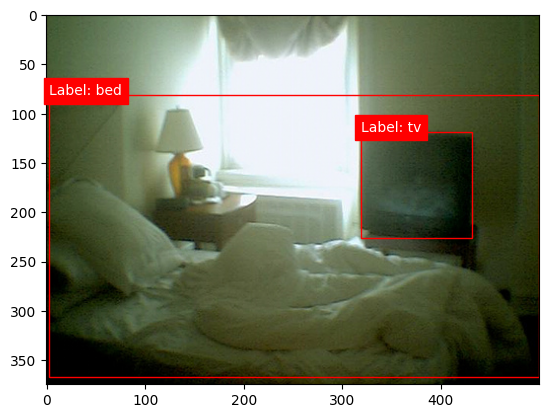

In [ ]:
SELECTED_IMAGE = 0
visualize_image(diag_data, SELECTED_IMAGE)

[{'boxes': tensor([[318.0201, 117.4988, 433.6181, 233.5794],
        [  1.5907, 157.8516, 494.0768, 372.4335],
        [134.2607, 223.5258, 490.6362, 370.6581],
        [  4.5076, 169.5172, 264.8254, 367.1102],
        [137.2525, 154.2508, 179.3712, 193.0394]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([72, 65, 65, 65, 86], device='cuda:0'), 'scores': tensor([0.9935, 0.9899, 0.2677, 0.1190, 0.0860], device='cuda:0',
       grad_fn=<IndexBackward0>)}]


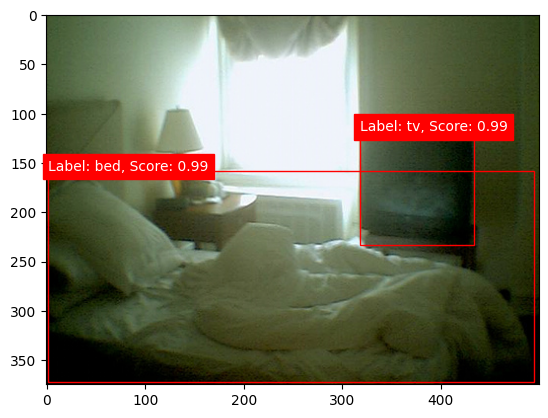

In [ ]:
visualize_outputs(diag_data_loader, model, 0.8)

[{'boxes': tensor([[314.7771, 117.2553, 434.2591, 224.5711],
        [  0.0000,  31.8955, 490.1407, 368.6911],
        [ 59.6863, 226.6870, 493.0711, 367.4084],
        [ 20.5510,  88.2821, 127.7344, 191.6210],
        [  0.0000,  13.9494, 500.0000, 368.6416],
        [315.7439, 116.1419, 435.0371, 231.4703]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([72, 65, 65, 73, 63, 73], device='cuda:0'), 'scores': tensor([0.9542, 0.9504, 0.8940, 0.2408, 0.0994, 0.0887], device='cuda:0',
       grad_fn=<IndexBackward0>)}]


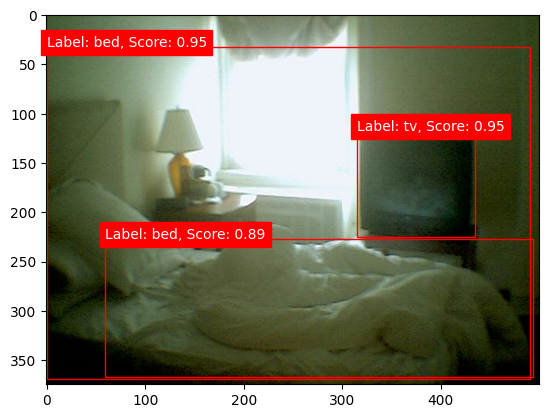

In [ ]:
# POST
visualize_outputs(diag_data_loader, model, 0.8)

In [ ]:
diag_data2 = obtain_model_dataset_subset(dataset_import, device, 30001, 76)

diag_dataset2 = dataset_iterable(diag_data2, get_transform(train=True))

diag_data_loader2 = torch.utils.data.DataLoader(
    diag_dataset2,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=utils.collate_fn
)

{'boxes': tensor([[433.6200, 165.0300, 516.6700, 345.1700],
        [558.9800, 323.7500, 593.1800, 362.1700],
        [401.2200, 246.6300, 413.2200, 266.8100],
        [411.7800, 245.8600, 423.8100, 266.0800],
        [383.3500, 248.8100, 393.2700, 263.0800],
        [157.4800, 256.4000, 245.9300, 282.2800]], device='cuda:0'), 'labels': tensor([82, 47, 47, 47, 47, 81], device='cuda:0'), 'image_id': 30001, 'area': tensor([14960.6270,  1313.9640,   242.1600,   243.2466,   141.5584,  2289.0859],
       device='cuda:0'), 'iscrowd': tensor([0, 0, 0, 0, 0, 0], device='cuda:0', dtype=torch.uint8)}


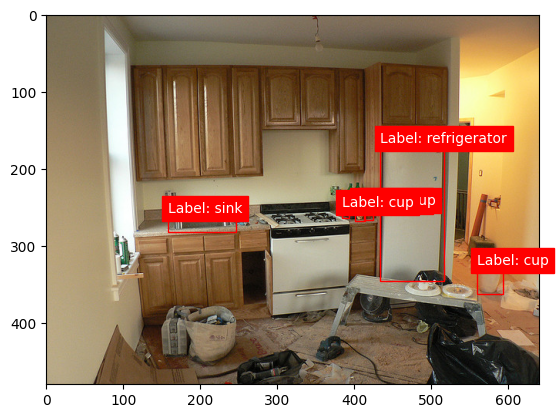

In [ ]:
visualize_image(diag_data2, SELECTED_IMAGE)

[{'boxes': tensor([[432.9570, 168.1645, 516.8579, 348.3085],
        [275.8850, 243.5056, 395.5291, 390.3202],
        [386.5946, 218.0060, 401.4203, 261.6950],
        [159.1344, 261.8258, 253.2347, 280.4378],
        [399.6469, 217.7905, 412.2094, 250.5252],
        [ 95.1713, 286.7415, 107.4075, 323.9089],
        [400.6639, 246.9784, 414.3410, 266.6037],
        [412.3780, 246.1324, 424.2313, 266.3249],
        [382.0285, 248.9966, 393.0492, 263.4735],
        [ 88.0609, 283.1909,  95.4390, 312.4382],
        [513.1445, 349.7498, 554.0690, 368.8111],
        [101.6164, 295.2034, 108.7216, 324.7401],
        [560.3702, 323.6521, 591.9336, 361.1693],
        [548.0309, 234.2510, 584.4173, 321.9777],
        [490.2672, 401.2139, 640.0000, 480.0000],
        [247.1609, 433.5258, 343.2503, 480.0000],
        [492.8656, 402.6002, 639.4800, 480.0000],
        [547.3378, 281.5519, 585.5446, 323.3073],
        [245.5692, 434.9512, 342.4134, 479.8794],
        [465.3606, 345.5220, 513.4680, 

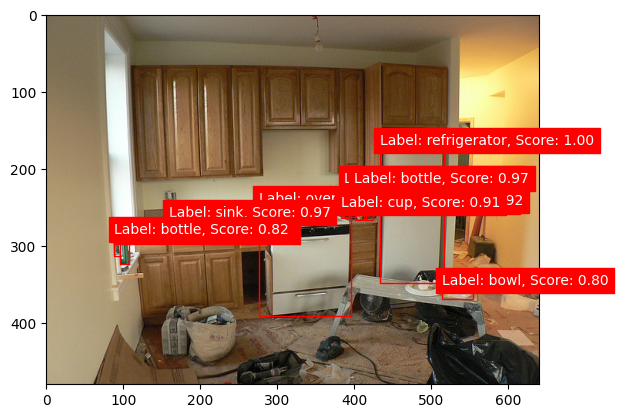

In [ ]:
visualize_outputs(diag_data_loader2, model, 0.8)

[{'boxes': tensor([[428.8009, 165.6770, 517.5025, 346.0243],
        [559.7177, 323.5453, 591.9062, 362.2078],
        [382.7262, 248.3852, 392.9166, 263.3481],
        [401.2725, 246.9414, 413.6870, 266.6884],
        [160.4615, 259.6850, 247.6699, 281.4983],
        [412.1544, 245.7896, 424.2432, 266.1261],
        [391.4464, 250.2856, 403.1747, 265.8361],
        [ 90.2598, 311.2589,  98.3878, 338.6031],
        [286.4950, 257.3932, 399.1813, 393.4473],
        [167.1590, 266.5978, 177.6655, 279.5646],
        [378.9947, 315.3801, 640.0000, 478.0785],
        [434.0508, 168.5732, 518.1448, 254.5719],
        [289.4286, 272.5178, 396.1807, 383.2886],
        [157.6477, 268.2689, 252.0250, 285.7433]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([82, 47, 47, 47, 81, 47, 47, 47, 82, 47, 67, 72, 72, 81],
       device='cuda:0'), 'scores': tensor([0.9997, 0.9991, 0.9971, 0.9962, 0.9855, 0.9840, 0.5095, 0.4357, 0.3565,
        0.1952, 0.0922, 0.0859, 0.0626, 0.0597]

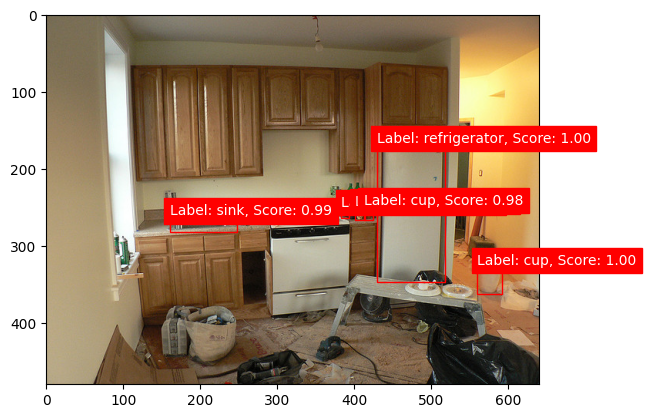

In [ ]:
# POST
visualize_outputs(diag_data_loader2, model, 0.8)

In [ ]:
diag_data3 = obtain_model_dataset_subset(dataset_import, device, 30001, 77)

diag_dataset3 = dataset_iterable(diag_data3, get_transform(train=True))

diag_data_loader3 = torch.utils.data.DataLoader(
    diag_dataset3,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=utils.collate_fn
)

{'boxes': tensor([[1.5317e+02, 6.0400e+01, 6.3856e+02, 4.6598e+02],
        [4.4000e-01, 2.6839e+02, 1.2132e+02, 3.9315e+02],
        [1.3611e+02, 1.4523e+02, 1.5179e+02, 1.5754e+02],
        [6.5050e+01, 1.5542e+02, 8.4890e+01, 1.7924e+02]], device='cuda:0'), 'labels': tensor([65, 73, 85, 47], device='cuda:0'), 'image_id': 30001, 'area': tensor([1.9686e+05, 1.5081e+04, 1.9302e+02, 4.7259e+02], device='cuda:0'), 'iscrowd': tensor([0, 0, 0, 0], device='cuda:0', dtype=torch.uint8)}


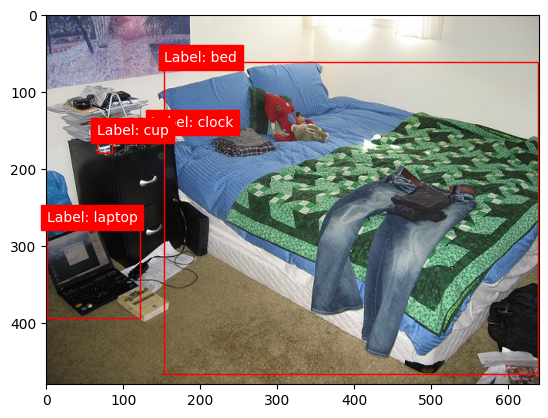

In [ ]:
SELECTED_IMAGE = 0
visualize_image(diag_data3, SELECTED_IMAGE)

[{'boxes': tensor([[0.0000e+00, 2.6622e+02, 1.2061e+02, 3.9229e+02],
        [1.4390e+02, 6.9595e+01, 6.4000e+02, 4.7267e+02],
        [9.4002e+01, 1.3279e+02, 1.1961e+02, 1.7179e+02],
        [2.8343e+02, 1.0150e+02, 3.5821e+02, 1.6522e+02],
        [1.2694e+02, 1.3736e+02, 1.5973e+02, 1.6800e+02],
        [3.1727e+02, 1.3391e+02, 3.6824e+02, 1.6672e+02],
        [9.2715e+01, 3.5196e+02, 1.6017e+02, 4.0023e+02],
        [6.3810e+01, 1.3930e+02, 8.3794e+01, 1.7912e+02],
        [5.7209e+02, 3.4987e+02, 6.4000e+02, 4.4267e+02],
        [5.9360e+02, 4.5410e+02, 6.3982e+02, 4.7969e+02],
        [1.6040e-01, 7.4570e-02, 6.3759e+01, 5.4242e+01],
        [1.3371e+02, 1.4258e+02, 1.5550e+02, 1.6063e+02],
        [1.6475e+01, 3.2977e+02, 1.1090e+02, 3.8353e+02],
        [3.2307e+02, 1.2563e+02, 3.4820e+02, 1.4409e+02],
        [3.5248e+01, 1.1023e+02, 5.8313e+01, 1.2345e+02],
        [4.4587e+02, 2.1839e+02, 5.2975e+02, 2.7229e+02],
        [1.6833e+01, 9.1089e+01, 1.2369e+02, 1.3839e+02],
   

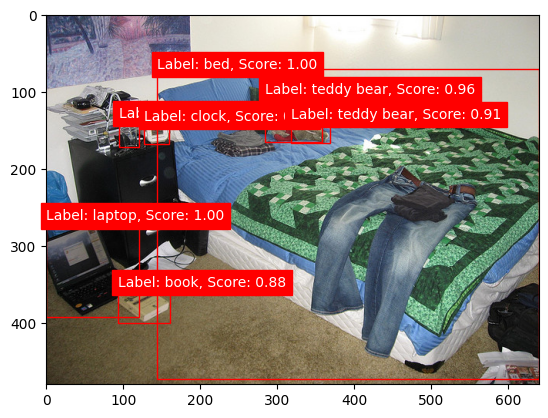

In [ ]:
visualize_outputs(diag_data_loader3, model, 0.8)

[{'boxes': tensor([[  0.0000, 263.3765, 121.4663, 393.3697],
        [140.6125,  63.0813, 639.0933, 448.4272],
        [135.5040, 144.5160, 153.3517, 158.1358],
        [  0.0000,   0.0000,  63.9655,  54.3148],
        [ 64.9569, 152.1907,  84.4333, 181.4363],
        [128.6298, 137.1291, 159.4793, 165.6539],
        [137.4674, 146.4727, 150.7560, 155.1256],
        [  1.9003, 265.9282,  93.3004, 354.3987],
        [ 77.4226, 138.1487, 640.0000, 460.7207]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([73, 65, 85, 62, 47, 85, 85, 72, 63], device='cuda:0'), 'scores': tensor([0.9994, 0.9991, 0.9229, 0.9139, 0.8882, 0.7787, 0.2617, 0.0825, 0.0633],
       device='cuda:0', grad_fn=<IndexBackward0>)}]


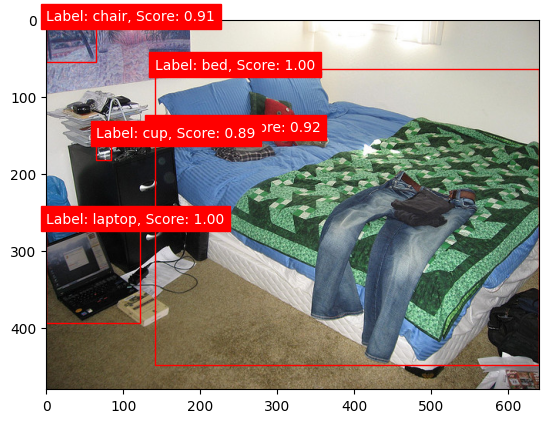

In [ ]:
# POST
visualize_outputs(diag_data_loader3, model, 0.8)

In [ ]:
diag_data4 = obtain_model_dataset_subset(dataset_import, device, 30001, 80)

diag_dataset4 = dataset_iterable(diag_data4, get_transform(train=True))

diag_data_loader4 = torch.utils.data.DataLoader(
    diag_dataset4,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=utils.collate_fn
)

{'boxes': tensor([[362.1600, 384.3200, 501.6200, 474.0500],
        [137.6900, 292.0600, 258.4700, 480.0000],
        [536.2800, 331.2700, 610.9400, 394.1300],
        [382.9200, 352.7200, 639.6400, 475.6900],
        [208.6800, 299.1000, 444.0200, 480.0000],
        [302.6300, 310.8300, 324.0400, 330.1300],
        [386.3000, 299.8900, 406.9700, 316.6700],
        [574.2900, 384.3000, 610.4800, 416.0400],
        [328.5500, 297.6900, 344.0700, 320.3400],
        [593.5200, 439.0200, 639.6900, 480.0000],
        [407.1700, 271.9100, 476.0200, 415.6500],
        [  1.2500, 253.0900,  93.5100, 418.9100],
        [  4.9500, 255.2500,  79.9400, 416.1200]], device='cuda:0'), 'labels': tensor([62, 62, 62, 67, 67, 47, 47, 47, 47, 47, 62, 67, 62], device='cuda:0'), 'image_id': 30001, 'area': tensor([12513.7461, 22699.3926,  4693.1274, 31568.8594, 42573.0078,   413.2130,
          346.8426,  1148.6707,   351.5280,  1892.0466,  9896.4990, 15298.5527,
        12063.6416], device='cuda:0'), 'iscro

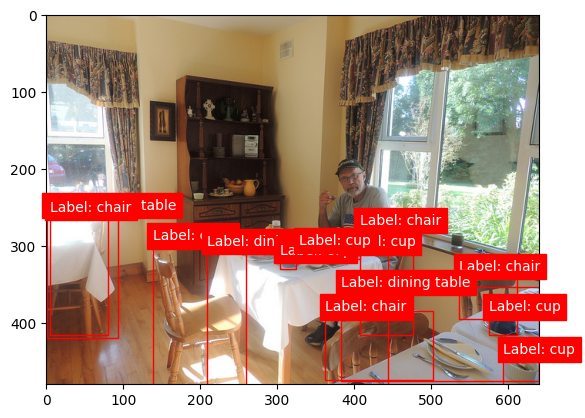

In [ ]:
SELECTED_IMAGE = 0
visualize_image(diag_data4, SELECTED_IMAGE)

[{'boxes': tensor([[140.8085, 295.4413, 264.0985, 478.0223],
        [351.8643, 188.7829, 455.3992, 348.0497],
        [537.5319, 331.9099, 609.5377, 395.4662],
        [360.2785, 383.6060, 500.9527, 477.1662],
        [438.6812, 270.8911, 475.3778, 388.5030],
        [223.0197, 289.6849, 441.1849, 477.0447],
        [  2.4210, 181.0323,  26.2624, 222.2260],
        [290.9707, 267.5812, 307.7486, 298.4962],
        [295.2898, 289.3244, 333.2223, 312.8123],
        [ 17.9998, 173.9153,  77.6492, 222.1884],
        [364.7737, 356.5726, 640.0000, 479.5349],
        [492.3126, 418.7879, 578.1403, 467.2570],
        [232.2446, 218.7857, 258.2173, 233.6131],
        [303.9147, 310.5849, 324.9944, 329.7616],
        [329.5880, 302.1598, 344.3765, 320.2702],
        [517.3240, 349.1808, 639.9030, 476.8289],
        [  0.0000, 277.6043,  87.1439, 416.8586],
        [245.9485, 214.8020, 254.4431, 222.2621],
        [191.6500, 231.7679, 205.6846, 241.2032],
        [309.1998, 281.5372, 327.7782, 

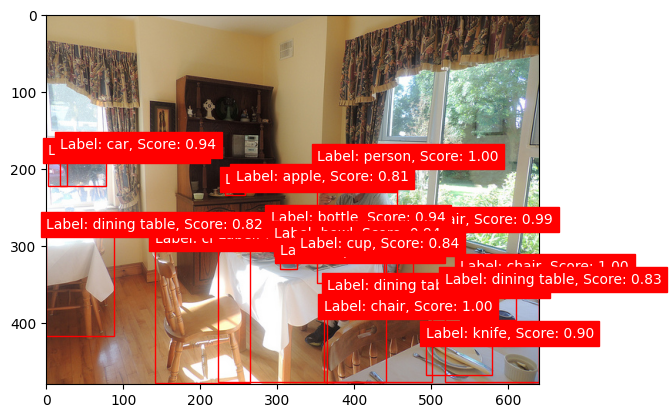

In [ ]:
visualize_outputs(diag_data_loader4, model, 0.8)

[{'boxes': tensor([[538.5270, 331.8685, 611.2120, 395.0573],
        [137.7549, 290.2061, 261.7500, 479.8743],
        [361.2132, 383.9897, 498.6931, 472.5803],
        [225.1124, 286.6292, 440.6865, 480.0000],
        [386.2759, 299.4261, 407.9484, 317.1141],
        [301.7719, 309.7400, 326.1211, 330.1348],
        [373.1312, 355.5848, 640.0000, 480.0000],
        [573.6318, 383.4842, 611.4728, 415.9703],
        [386.0136, 274.4305, 477.8267, 432.0127],
        [438.2497, 270.8059, 474.4381, 389.9280],
        [  0.0000, 244.9198,  81.3305, 421.9621],
        [256.2083, 214.5148, 276.7082, 235.7307],
        [594.0992, 440.9739, 637.8657, 480.0000],
        [329.7671, 299.5641, 344.1026, 320.5717],
        [364.7445, 291.0998, 386.6627, 327.5815],
        [225.4443, 319.2092, 623.9752, 479.1070],
        [349.6161, 289.7005, 371.4137, 319.5658],
        [  1.8045, 257.2748,  87.7740, 418.4643],
        [232.1736, 226.2245, 238.8319, 234.4585],
        [526.6094, 284.7991, 542.4574, 

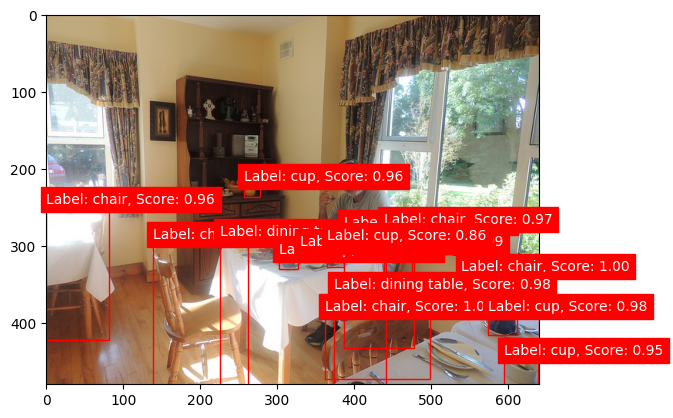

In [ ]:
# POST
visualize_outputs(diag_data_loader4, model, 0.8)

In [ ]:
diag_data5 = obtain_model_dataset_subset(dataset_import, device, 30001, 84)

diag_dataset5 = dataset_iterable(diag_data5, get_transform(train=True))

diag_data_loader5 = torch.utils.data.DataLoader(
    diag_dataset5,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=utils.collate_fn
)

{'boxes': tensor([[280.3500, 126.6900, 462.6700, 220.0100]], device='cuda:0'), 'labels': tensor([81], device='cuda:0'), 'image_id': 30001, 'area': tensor([17014.1016], device='cuda:0'), 'iscrowd': tensor([0], device='cuda:0', dtype=torch.uint8)}


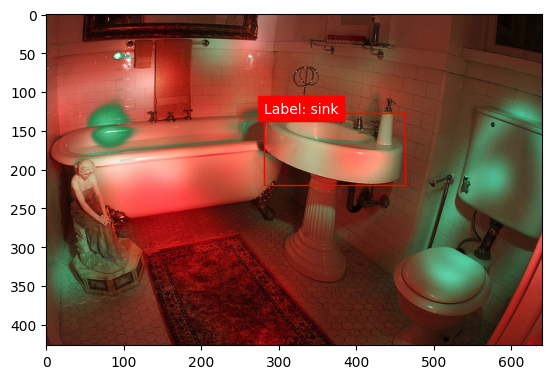

In [ ]:
SELECTED_IMAGE = 0
visualize_image(diag_data5, SELECTED_IMAGE)

[{'boxes': tensor([[277.1600, 125.3249, 461.8367, 218.5283],
        [442.4610,  95.9884, 639.4522, 426.1067],
        [  7.4665, 129.2681, 289.4572, 189.4471],
        [447.1117, 297.4529, 573.7003, 426.5305],
        [ 30.6110, 187.6199, 128.1411, 365.9651],
        [425.4097, 108.1190, 449.8978, 171.7190],
        [ 58.5601, 144.5484, 112.5330, 172.7453],
        [ 30.9514, 185.6281,  95.9969, 321.4594],
        [  5.6000, 124.4806, 306.4195, 260.9725],
        [312.7331, 136.3258, 416.0605, 168.8243],
        [412.0217, 102.8152, 432.3993, 145.4365],
        [ 86.2699,  47.3284, 110.9246,  58.5630],
        [301.3207, 132.9961, 456.1098, 176.8014],
        [277.9567, 118.7640, 460.9720, 348.6989],
        [ 54.4227, 116.0417, 108.0202, 145.7489],
        [ 77.3141, 248.0402, 107.6352, 289.9260],
        [ 78.7124, 249.6868, 107.5961, 290.5876]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([81, 70, 81, 70,  1, 44, 51,  1, 81, 81, 44, 10, 81, 81, 51, 31, 28],


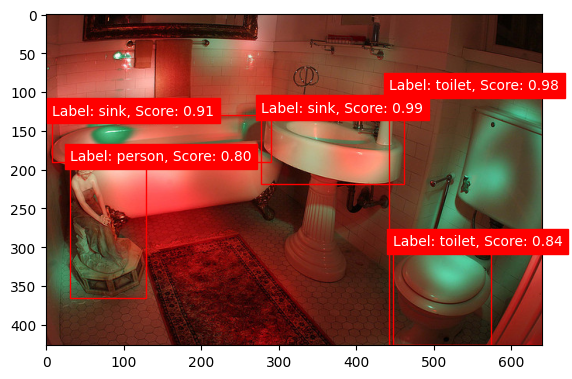

In [ ]:
visualize_outputs(diag_data_loader5, model, 0.8)

[{'boxes': tensor([[280.2355, 126.0640, 458.7177, 218.0170],
        [526.7524, 100.6668, 640.0000, 294.8666]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([81, 72], device='cuda:0'), 'scores': tensor([0.9982, 0.2198], device='cuda:0', grad_fn=<IndexBackward0>)}]


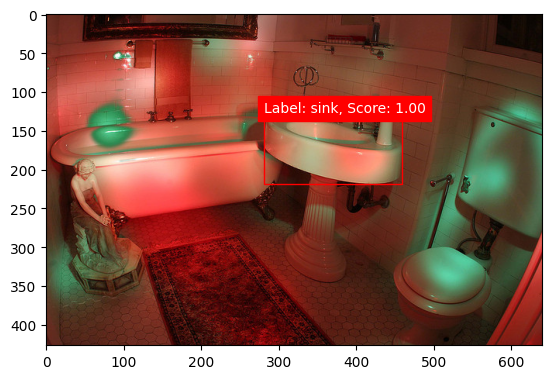

In [ ]:
#POST
visualize_outputs(diag_data_loader5, model, 0.8)